In [120]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
import seaborn as sns

In [136]:
df = pd.read_csv(r'C:\Users\91936\Desktop\Datasets\Spotify songs\spotify_songs.csv', encoding = 'unicode_escape')

In [ ]:
#Data Cleaning

In [122]:
df.dropna(inplace=True)
df.drop_duplicates(subset='track_id', inplace=True)

In [148]:
df['album_release_year'] = pd.to_datetime(df['track_album_release_date'], format='%Y-%m-%d', errors='coerce').dt.year

In [ ]:
#Data Exploration and Visualization

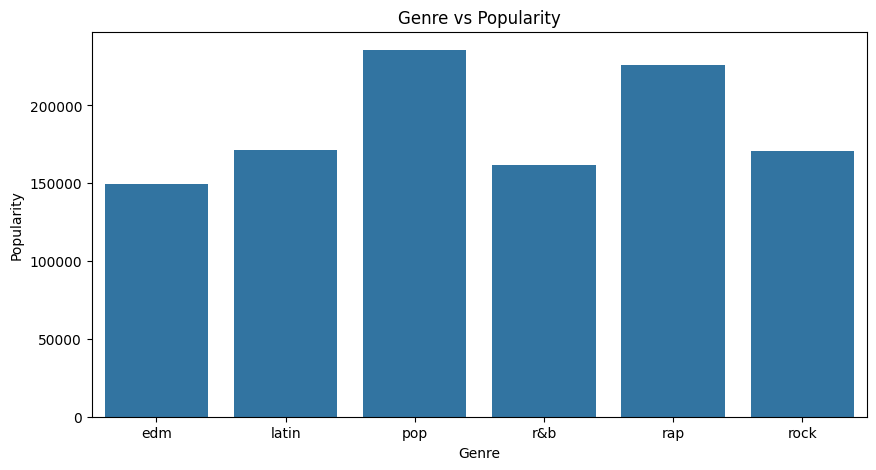

In [124]:
top_genre = df.groupby('playlist_genre')['track_popularity'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='playlist_genre', y='track_popularity', data=top_genre)
plt.title('Genre vs Popularity')
plt.xlabel('Genre')
plt.ylabel('Popularity') 
plt.show()

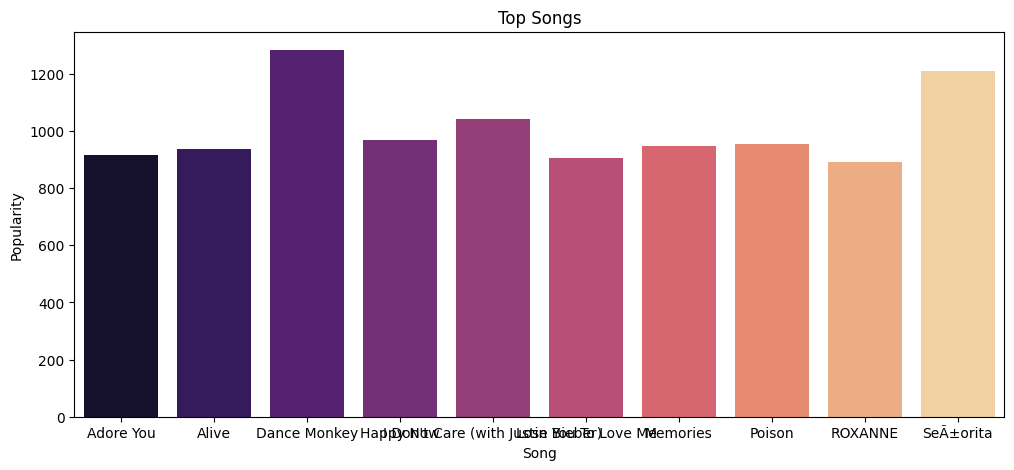

In [147]:
top_songs = df.groupby('track_name')['track_popularity'].sum().reset_index()
top_10_songs = top_songs.groupby(['track_name'])['track_popularity'].sum().nlargest(10).index
top_10_songs_data = top_songs[top_songs['track_name'].isin(top_10_songs)]

plt.figure(figsize=(12, 5))
sns.barplot(x='track_name', y='track_popularity', hue='track_name', data=top_10_songs_data, palette='magma', legend=False)


plt.title('Top Songs')
plt.xlabel('Song')
plt.ylabel('Popularity')
plt.show()

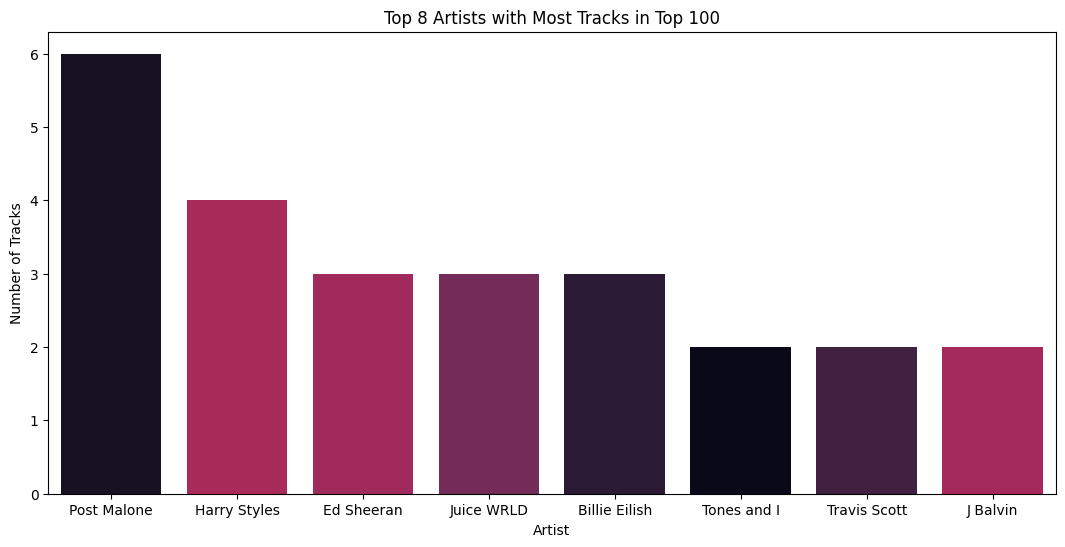

In [126]:
top_100_tracks = df.sort_values(by='track_popularity', ascending=False).head(100)

top_artists = top_100_tracks['track_artist'].value_counts().nlargest(8)

colormap = "rocket"

plt.figure(figsize=(13, 6))
sns.countplot(data=top_100_tracks, x='track_artist', hue='track_artist', order=top_artists.index, palette=colormap)
plt.title('Top 8 Artists with Most Tracks in Top 100')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')

plt.show()

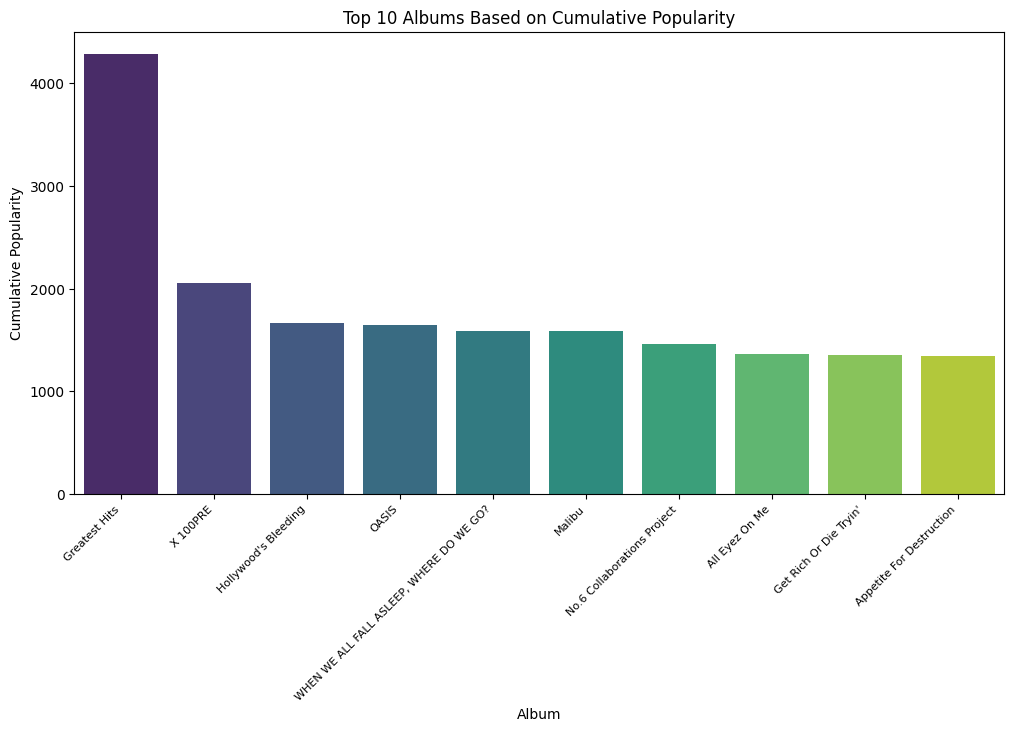

In [146]:
top_albums = df.groupby('track_album_name')['track_popularity'].sum().reset_index()

top_10_albums = top_albums.nlargest(10, 'track_popularity')

plt.figure(figsize=(12, 6))
sns.barplot(x='track_album_name', y='track_popularity', hue='track_album_name', data=top_10_albums, palette='viridis', dodge=False)

plt.title('Top 10 Albums Based on Cumulative Popularity')
plt.xlabel('Album')
plt.ylabel('Cumulative Popularity')
plt.legend([], [], frameon=False)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()

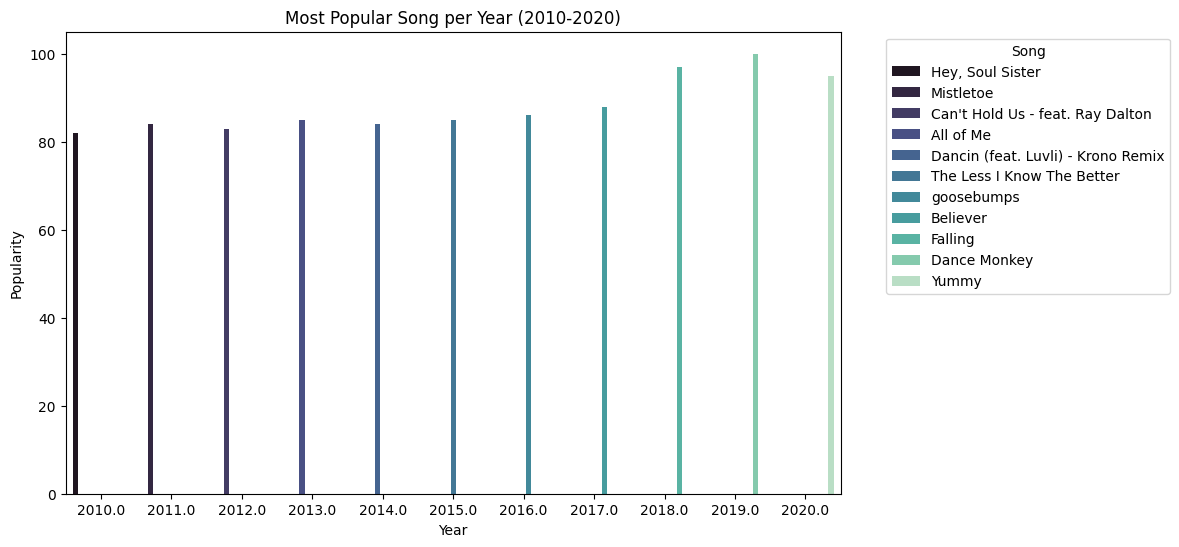

In [135]:
df_filtered = df[(df['album_release_year'] >= 2010) & (df['album_release_year'] <= 2020)]

top_songs_per_year = df_filtered.loc[df_filtered.groupby('album_release_year')['track_popularity'].idxmax()]

plt.figure(figsize=(10, 6))
sns.barplot(x='album_release_year', y='track_popularity', hue='track_name', data=top_songs_per_year, dodge=True, palette='mako')
plt.title('Most Popular Song per Year (2010-2020)')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.legend(title='Song', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
#For the data exploration we can conclude the most popular Genre, Artists, Songs and Albums of all times streamed on Spotify 